# HEART DISEASE PREDICTION

**Loading Dataset**

In [9]:
import pandas as pd
import numpy as np
# https://www.kaggle.com/fedesoriano/heart-failure-prediction
df = pd.read_csv("heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Exploratory Data Analysis**

Treat Outliers

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [58]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [59]:
df[df['Age']>(df['Age'].mean()+3*df['Age'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [62]:
df[df['RestingBP']>(df['RestingBP'].mean()+3*df['RestingBP'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [63]:
df1 = df[df['RestingBP']<=(df['RestingBP'].mean()+3*df['RestingBP'].std())]
df1.shape


(911, 12)

In [64]:
df1[df1['Cholesterol']>(df1['Cholesterol'].mean()+3*df1['Cholesterol'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [65]:
df2 = df1[df1['Cholesterol']<=(df1['Cholesterol'].mean()+3*df1['Cholesterol'].std())]
df2.shape

(908, 12)

In [66]:
df2[df2['MaxHR']>(df2['MaxHR'].mean()+3*df2['MaxHR'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [67]:
df2[df2['Oldpeak']>(df2['Oldpeak'].mean()+3*df2['Oldpeak'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [68]:
df3=df2[df2['Oldpeak']<=(df2['Oldpeak'].mean()+3*df2['Oldpeak'].std())]
df3.shape

(902, 12)

**All oultiers removed** 

**Let's visualize data using pairplot so that we may get overview**

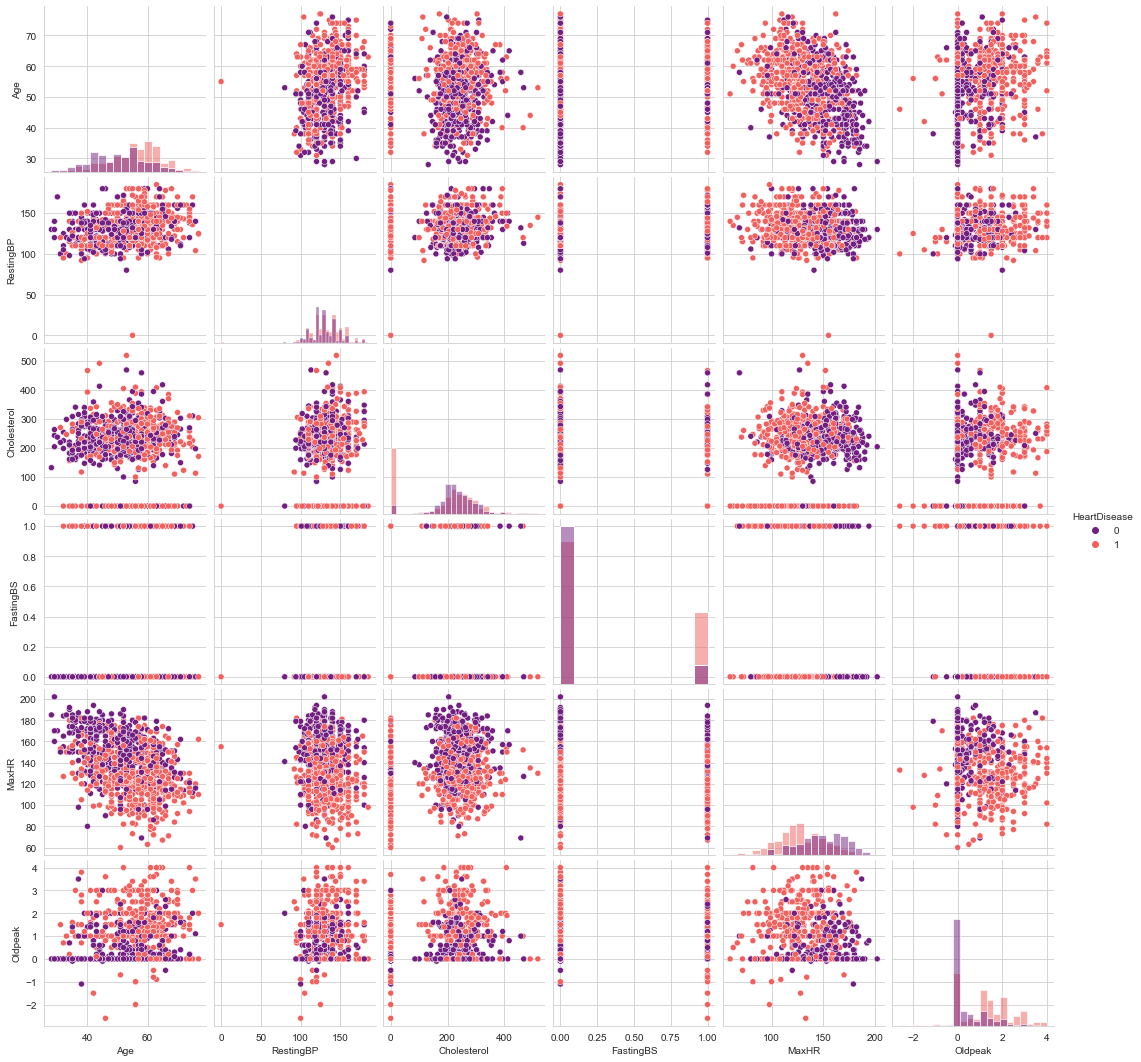

In [71]:
sns.pairplot(data=df3, hue='HeartDisease',diag_kind='hist',palette='magma')

**Converting string features to numeric**

In [72]:
df4 = pd.get_dummies(df3, drop_first=True)
df4.head(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0


In [73]:
df4.shape

(902, 16)

**Creating model data**

In [74]:
X = df4.drop("HeartDisease",axis=1)
y = df4['HeartDisease']

X.head(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0


**Scaling features**

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[-1.42896269,  0.46089071,  0.85238015, ..., -0.82065181,
        -1.00221976,  1.13805334],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.82065181,
         0.99778516, -0.87869344],
       [-1.74679706, -0.10495034,  0.79657967, ..., -0.82065181,
        -1.00221976,  1.13805334],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ...,  1.21854359,
         0.99778516, -0.87869344],
       [ 0.37209878, -0.10495034,  0.35947592, ..., -0.82065181,
         0.99778516, -0.87869344],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.82065181,
        -1.00221976,  1.13805334]])

**Splitting data for modelling**

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=30)

In [78]:
print(X_train.shape)
print(X_test.shape)

(631, 15)
(271, 15)


**Creating Model**

In [79]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(random_state=0)
logmodel.fit(X_train,y_train)
logmodel.score(X_train,y_train)

0.8811410459587956

In [112]:
log_pred=logmodel.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,log_pred ))
print(classification_report(y_test,log_pred ))

[[104  32]
 [ 12 123]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       136
           1       0.79      0.91      0.85       135

    accuracy                           0.84       271
   macro avg       0.85      0.84      0.84       271
weighted avg       0.85      0.84      0.84       271



In [125]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
rfc.score(X_train,y_train)


1.0

In [126]:
rf_pred=rfc.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,rf_pred ))
print(classification_report(y_test,rf_pred ))

[[107  29]
 [  9 126]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       136
           1       0.81      0.93      0.87       135

    accuracy                           0.86       271
   macro avg       0.87      0.86      0.86       271
weighted avg       0.87      0.86      0.86       271



In [82]:
# SVM

from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,y_train)
svc_model.score(X_train,y_train)

0.9175911251980983

In [115]:
svc_pred=svc_model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,svc_pred ))
print(classification_report(y_test,svc_pred ))

[[108  28]
 [  6 129]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       136
           1       0.82      0.96      0.88       135

    accuracy                           0.87       271
   macro avg       0.88      0.87      0.87       271
weighted avg       0.88      0.87      0.87       271



In [127]:
#SVC with GridSearch
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
grid.score(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

0.93026941362916

In [128]:
grid_pred=grid.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,grid_pred ))
print(classification_report(y_test,grid_pred ))

[[106  30]
 [  5 130]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       136
           1       0.81      0.96      0.88       135

    accuracy                           0.87       271
   macro avg       0.88      0.87      0.87       271
weighted avg       0.88      0.87      0.87       271



# Use PCA to reduce dimensions

In [85]:
X.head(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0


In [86]:
from sklearn.decomposition import PCA

In [103]:
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X)
X_pca


array([[ 9.38251657e+01, -2.94034348e+01, -1.15875579e+01, ...,
         7.32974154e-02, -3.12076942e-01,  3.11742340e-01],
       [-1.55838004e+01, -1.41053471e+01, -3.16822528e+01, ...,
        -2.61052705e-01,  2.01492106e-01,  1.20276555e-01],
       [ 8.32954414e+01,  3.86855397e+01,  1.53994145e+01, ...,
         1.02555527e-01, -4.17163625e-01,  4.09780989e-01],
       ...,
       [-6.75727787e+01,  1.76156540e+01,  4.35145724e+00, ...,
        -3.77640486e-01, -1.49248889e-02, -4.45364105e-02],
       [ 4.07035522e+01, -3.33830860e+01, -5.99050662e+00, ...,
        -4.07203194e-01,  6.67085052e-02,  2.27479073e-01],
       [-1.99132065e+01, -3.72932134e+01, -1.33146093e+01, ...,
        -2.54988470e-02, -1.70841171e-01,  7.24164093e-02]])

In [105]:
X_pca.shape

(902, 12)

In [106]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=30)

In [107]:
#Logistic regression after PCA
from sklearn.linear_model import LogisticRegression
logmodel_pca=LogisticRegression(random_state=0, max_iter=1000)
logmodel_pca.fit(X_train_pca,y_train)
logmodel_pca.score(X_train_pca,y_train)

0.8748019017432647

In [129]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc_pca=RandomForestClassifier(n_estimators=600)
rfc_pca.fit(X_train_pca,y_train)
rfc_pca.score(X_train_pca,y_train)


1.0

In [130]:
# SVM

from sklearn.svm import SVC
svc_model_pca=SVC()
svc_model_pca.fit(X_train_pca,y_train)
svc_model_pca.score(X_train_pca,y_train)

0.7448494453248812

In [131]:
#SVC with GridSearch
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 
grid_pca = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid_pca.fit(X_train_pca,y_train)
grid_pca.score(X_train_pca,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END ...................

0.9223454833597464